In [27]:
# This notebook analyses the ouput of 
# running complexity.py

# grep 'for_parser:' complexity_PM.txt | sed 's/for_parser:,//g' | sed '1 i\cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac, CSR_PM_count'
# The above shell must be run and saved to PM.csvCSR_PM_frac

In [34]:
import sys

sys.path.append("../")
import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

In [35]:
import pandas as pd
df = pd.read_csv("PM_cont_complete_2.csv")

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}
df.head()

,cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac,CSR_PM_count,CSR_PM_no_thresh_median,CSR_PM_no_thresh_mean,CSR_PM_no_thresh_frac_median,CSR_PM_no_thresh_frac_mean
0,london,1,1,45,500,400,200,NaN,NaN,903.0,966.530167,1.000000,1.115061
1,london,2,1,45,500,400,200,NaN,NaN,1232.0,1388.018816,0.992194,1.106803
2,london,3,1,45,500,400,200,NaN,NaN,1227.0,1345.714839,0.987659,1.067173
3,london,4,1,45,500,400,200,NaN,NaN,1273.5,1397.352863,0.987480,1.054456
4,london,5,1,45,500,400,200,NaN,NaN,1322.0,1480.482353,0.994585,1.074472


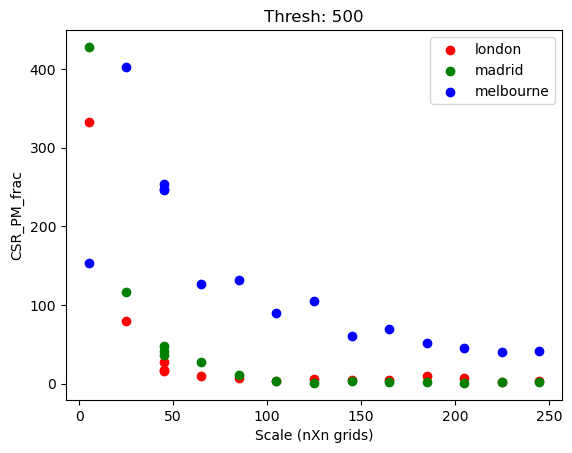

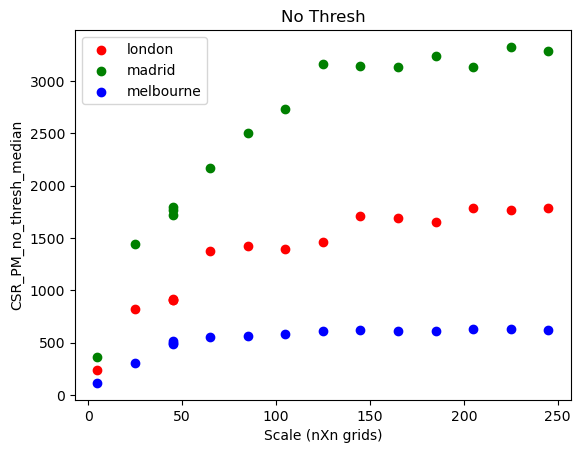

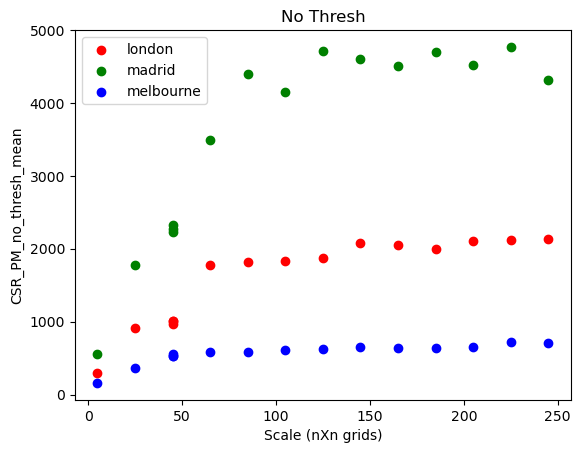

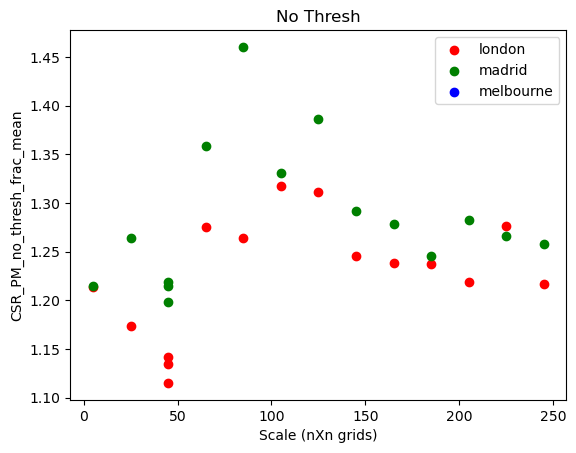

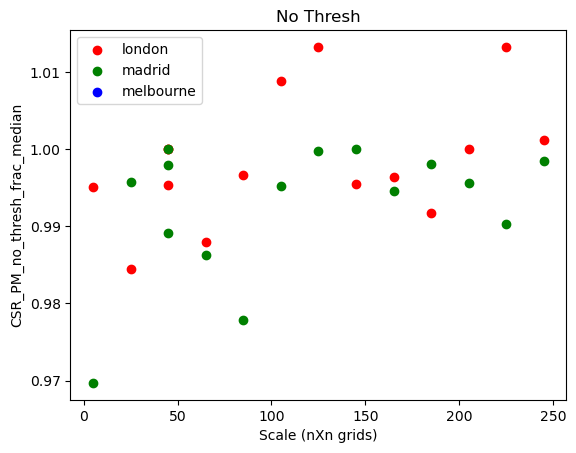

In [36]:

# scales
df = pd.read_csv("PM_cont.csv")

for thresh in [500]:

    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]

                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_count, color=city_color[cityname])
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_count, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("Thresh: " + str(thresh))
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel("CSR_PM_frac")
    plt.legend()
    plt.show()
    
    
#### For all other i.e NK_complexity, we use the other file where fractional values are present
           
df = pd.read_csv("PM_cont_complete_2.csv")        
for thresh in [500]:
    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]

                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_no_thresh_median, color=city_color[cityname])
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_no_thresh_median, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("No Thresh")
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel("CSR_PM_no_thresh_median")
    plt.legend()
    plt.show()
                                    

for thresh in [500]:
    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]

                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_no_thresh_mean, color=city_color[cityname])
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_no_thresh_mean, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("No Thresh")
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel("CSR_PM_no_thresh_mean")
    plt.legend()
    plt.show()
    
    
    

for thresh in [500]:
    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]

                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_no_thresh_frac_mean, color=city_color[cityname])
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_no_thresh_frac_mean, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("No Thresh")
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel("CSR_PM_no_thresh_frac_mean")
    plt.legend()
    plt.show()    
                       
        
        
for thresh in [500]:
    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []


        for scale in config.scales:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]

                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap                      
                        
                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_no_thresh_frac_median, color=city_color[cityname])
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_no_thresh_frac_median, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("No Thresh")
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel("CSR_PM_no_thresh_frac_median")
    plt.legend()
    plt.show()    
                               